In [4]:
import pandas as pd

from mitotic_classifer import *

# Running SVM model with file:
# 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#
# 221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs
# 221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs


In [5]:
df_ori_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_final_data.csv')
df_cellcyle_230109=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/230109_CellCycleExp_RPE1cdk1as_Rep3_5uM_singlecell_cellcycle.csv')

df_ori_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_final_data.csv')
df_cellcyle_221108_P1=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs_singlecell_cellcycle.csv')
df_ori_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_final_data.csv')
df_cellcyle_221108_P2=pd.read_csv('/Users/haoranyue/Downloads/OneDrive_1_01-02-2023/221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs_singlecell_cellcycle.csv')


# 1. 230109_CellCycleExp_RPE1cdk1as_Rep3_5uM#

In [6]:
# print(df_cellcyle_230109.groupby('cell_cycle').count())
df_all=merge_data(df1=df_ori_230109,df2=df_cellcyle_230109,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713,...,32713,32713,32713,32713,32713,32713,32713,32713,32713,32713
G2/M,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872,...,16872,16872,16872,16872,16872,16872,16872,16872,16872,16872
Polyploid,908,908,908,908,908,908,908,908,908,908,...,908,908,908,908,908,908,908,908,908,908
Polyploid (replicating),116,116,116,116,116,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
S,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766,...,5766,5766,5766,5766,5766,5766,5766,5766,5766,5766
Sub-G1,195,195,195,195,195,195,195,195,195,195,...,195,195,195,195,195,195,195,195,195,195


In [7]:
data=pd.concat([df_all[df_all['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data


,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,RPE-1,1NM_24h,24.0,313.0,2.633145e+06,2.633145e+06,11558.993369,1874.698040,11558.993369,8412.604972,...,7901.765479,14375.941918,1,2808,4.410673,1.006179,2.036560,2.065591,G2,G2/M
1,RPE-1,Palb_24h,200.0,264.0,2.491305e+06,2.491305e+06,14430.959130,2356.178908,14430.959130,9436.761891,...,8876.211642,10436.518627,1,1805,4.173082,0.982093,1.309113,1.742224,G2,G2/M
2,RPE-1,1NM_24h,193.0,231.0,2.425178e+06,2.425178e+06,18949.939319,2867.279631,18949.939319,10498.605161,...,6997.243691,10961.841001,1,1318,4.062315,1.012680,0.955906,1.524446,G2,G2/M
3,RPE-1,1NM_TAK_12h,133.0,200.0,2.304749e+06,2.304749e+06,17854.800224,2690.939466,17854.800224,11523.744865,...,6854.439480,10787.964758,1,1419,3.860590,1.066124,1.029159,1.319866,G2,G2/M
4,RPE-1,Palb_24h,70.0,231.0,2.414231e+06,2.414231e+06,17040.166595,2185.034382,17040.166595,10451.215709,...,8666.317263,15542.298301,1,2100,4.043978,0.988832,1.523068,1.524446,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,DMSO,104.0,247.0,2.032215e+06,2.032215e+06,10641.785702,2133.891919,10641.785702,8227.592434,...,8244.994507,13685.147144,1,1481,3.404080,0.999041,1.074126,1.630035,G2,G2/M
16868,RPE-1,1NM_TAK_24h,39.0,195.0,2.362432e+06,2.362432e+06,21446.661905,2744.926787,21446.661905,12115.037273,...,10491.055653,20462.227729,1,1371,3.957212,1.091868,0.994346,1.286870,G2,G2/M
16869,RPE-1,1NM_24h,51.0,234.0,2.611899e+06,2.611899e+06,17695.378357,2224.329623,17695.378357,11161.960465,...,7638.888838,11598.401185,1,2086,4.375083,0.980608,1.512914,1.544244,G2,G2/M
16870,RPE-1,TAK931_12h,48.0,303.0,2.463451e+06,2.463451e+06,11722.013815,1957.524867,11722.013815,8130.202830,...,6102.069618,9599.564065,1,2338,4.126425,0.961405,1.695682,1.999598,G2,G2/M


# pre-trained SVM
# without Edu

accuracy 0.5798364153627311


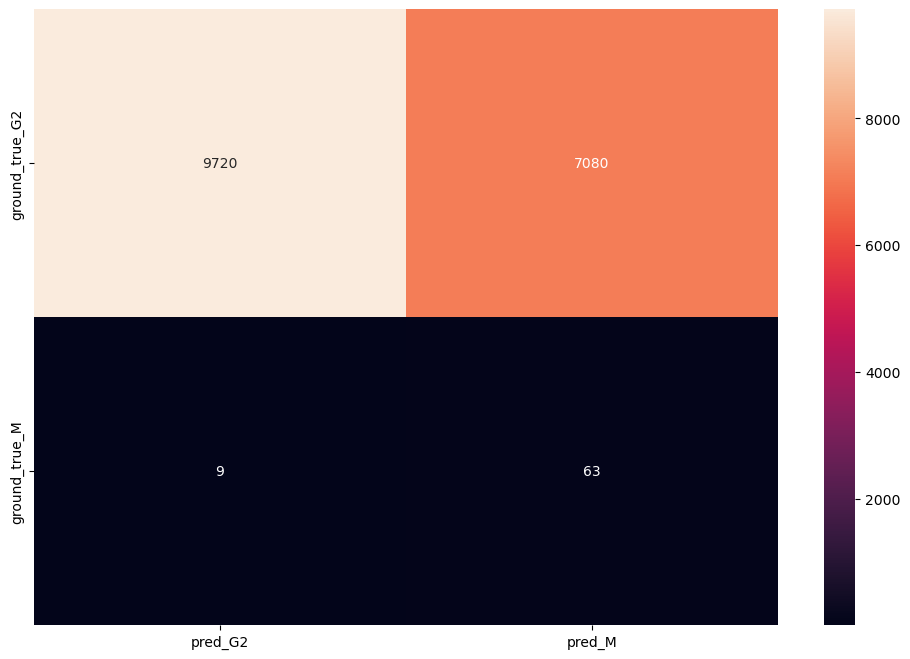

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,TAK931_24h,26.0,258.0,2.365438e+06,2.365438e+06,15082.610875,2277.395267,15082.610875,9168.363644,...,11366.109461,1,1827,3.962247,0.969471,1.325069,1.702628,G2,G2/M,G2
1,RPE-1,Palb_12h,108.0,280.0,2.649696e+06,2.649696e+06,12368.548125,2589.752639,12368.548125,9463.198729,...,10851.731898,1,2032,4.438395,0.957281,1.473750,1.847813,G2,G2/M,G2
2,RPE-1,1NM_12h,89.0,434.0,2.332989e+06,2.332989e+06,6897.490942,1286.559193,6897.490942,5375.549748,...,14074.580275,1,5895,3.907893,0.983964,4.275469,2.864110,G2,G2/M,M
3,RPE-1,1NM_TAK_24h,6.0,227.0,2.048765e+06,2.048765e+06,12238.817298,1493.132583,12238.817298,9025.396494,...,18810.929334,1,3049,3.431801,1.033677,2.211350,1.498048,G2,G2/M,G2
4,RPE-1,NT,78.0,260.0,2.672219e+06,2.672219e+06,15841.822829,2695.494645,15841.822829,10277.767086,...,13867.961772,1,1631,4.476124,0.972534,1.182916,1.715826,G2,G2/M,G2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16867,RPE-1,Palb_24h,132.0,282.0,2.721245e+06,2.721245e+06,15965.698495,2888.105692,15965.698495,9649.803209,...,12746.929742,1,1495,4.558244,1.005704,1.084279,1.861012,G2,G2/M,G2
16868,RPE-1,DMSO,166.0,173.0,2.064166e+06,2.064166e+06,17800.773128,4556.459135,17800.773128,11931.593622,...,14069.794662,1,615,3.457598,1.031481,0.446041,1.141684,G2,G2/M,M
16869,RPE-1,1NM_12h,116.0,155.0,2.510276e+06,2.510276e+06,26869.292517,4506.176422,26869.292517,16195.331037,...,17607.752197,1,858,4.204860,1.100468,0.622282,1.022897,G2,G2/M,G2
16870,RPE-1,1NM_TAK_12h,13.0,210.0,2.157062e+06,2.157062e+06,17494.842806,2836.814172,17494.842806,10271.724715,...,18756.874478,1,1165,3.613205,1.015976,0.844940,1.385860,G2,G2/M,M


In [5]:
data_without_edu=check_pretrained_model(data=data,pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'area_cell_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_without_edu

# include EdU

In [9]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X_train_std = scaler.fit_transform(data[[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ]])


# Create a PCA object with the desired number of components
pca = PCA(n_components=15)

# Fit the PCA model to the training data and transform the training and testing data
X_train_pca = pca.fit_transform(X_train_std)



pretrained_svm=load('pretrained_SVM_U20S_with_edu_2.joblib')

# # Train a logistic regression model on the transformed training data
# clf_svm_hp = svm.SVC( random_state=24,C=100,gamma='scale',decision_function_shape='ovo',kernel='rbf')
# clf_svm_hp.fit(X_train_pca, y_train)

# Predict the labels of the transformed testing data
y_pred = pretrained_svm.predict(X_train_pca)

# Compute the classification accuracy
accuracy = accuracy_score(data['cell_cycle_detailed'], y_pred)
print("Classification accuracy: {:.2f}".format(accuracy))

Classification accuracy: 0.50


In [8]:
data_with_edu=check_pretrained_model(data,pretrained_svm='pretrained_SVM_U20S_with_edu_2.joblib',features=[ 'intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'integrated_int_DAPI',  'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','DAPI_total_norm',
       'intensity_max_Tub_nucleus','intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto',
       'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto',
       'area_cell_norm',
       'EdU_mean_corr_norm',
       'area_nucleus_norm',
       ],label='cell_cycle_detailed')
data_with_edu

ValueError: X has 21 features, but SVC is expecting 15 features as input.

# 2. 221108_DepMap_Exp6_siRNAscreen_Plate1_72hrs

In [6]:
df_cellcyle_221108_P1.groupby('cell_cycle_detailed').count()

,Unnamed: 0,experiment,plate_id,well,well_id,image_id,cell_line,condition,Cyto_ID,area_cell,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,65382,65382,65382,65382,65382,65382,65382,65382,65382,65382,...,65382,65382,65382,65382,65382,65382,65382,65382,65382,65382
G1,175556,175556,175556,175556,175556,175556,175556,175556,175556,175556,...,175556,175556,175556,175556,175556,175556,175556,175556,175556,175556
G2,64339,64339,64339,64339,64339,64339,64339,64339,64339,64339,...,64339,64339,64339,64339,64339,64339,64339,64339,64339,64339
Late S,39378,39378,39378,39378,39378,39378,39378,39378,39378,39378,...,39378,39378,39378,39378,39378,39378,39378,39378,39378,39378
M,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775,...,5775,5775,5775,5775,5775,5775,5775,5775,5775,5775
Polyploid,8102,8102,8102,8102,8102,8102,8102,8102,8102,8102,...,8102,8102,8102,8102,8102,8102,8102,8102,8102,8102
Polyploid (replicating),6327,6327,6327,6327,6327,6327,6327,6327,6327,6327,...,6327,6327,6327,6327,6327,6327,6327,6327,6327,6327
Sub-G1,4074,4074,4074,4074,4074,4074,4074,4074,4074,4074,...,4074,4074,4074,4074,4074,4074,4074,4074,4074,4074


In [7]:
df_all_p1=merge_data(df1=df_ori_221108_P1,df2=df_cellcyle_221108_P1,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_p1.groupby('cell_cycle_detailed').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,label,area_nucleus,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle
cell_cycle_detailed,,,,,,,,,,,,,,,,,,,,,
Early S,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461,...,64461,64461,64461,64461,64461,64461,64461,64461,64461,64461
G1,172958,172958,172958,172958,172958,172958,172958,172958,172958,172958,...,172958,172958,172958,172958,172958,172958,172958,172958,172958,172958
G2,57930,57930,57930,57930,57930,57930,57930,57930,57930,57930,...,57930,57930,57930,57930,57930,57930,57930,57930,57930,57930
Late S,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,...,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148
M,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437,...,5437,5437,5437,5437,5437,5437,5437,5437,5437,5437
Polyploid,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964,...,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964
Polyploid (replicating),3485,3485,3485,3485,3485,3485,3485,3485,3485,3485,...,3485,3485,3485,3485,3485,3485,3485,3485,3485,3485
Sub-G1,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989,...,3989,3989,3989,3989,3989,3989,3989,3989,3989,3989


In [8]:
data_p1=pd.concat([df_all_p1[df_all_p1['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data_p1

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,MM231,FNTA,275.0,143.0,1.764006e+06,1.764006e+06,20552.743705,3167.606393,20552.743705,12335.708085,...,10066.289582,18998.388795,1,775,3.361477,1.068179,1.509391,1.305678,G2,G2/M
1,RPE-1,NT,596.0,413.0,2.139661e+06,2.139661e+06,7186.701471,1726.719422,7186.701471,5180.777324,...,5191.945922,8363.660048,1,2741,4.649165,0.979546,2.379080,2.529007,G2,G2/M
2,U2OS,CDC27,279.0,50.0,2.007591e+06,2.007591e+06,63615.533347,19282.489543,63615.533347,40151.824744,...,6965.007345,9813.386569,1,118,3.152864,0.945590,0.135794,0.297831,G2,G2/M
3,MM231,FNTA,341.0,197.0,2.118122e+06,2.118122e+06,14028.380414,3246.687576,14028.380414,10751.888925,...,10112.177329,16318.113815,1,958,4.036277,1.031787,1.865802,1.798731,G2,G2/M
4,MM231,CDC27,85.0,230.0,2.678608e+06,2.678608e+06,18998.368598,3709.215633,18998.368598,11646.121792,...,13978.655769,17053.997079,1,999,5.104335,1.007618,1.945653,2.100041,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,U2OS,CDC27,644.0,119.0,2.980639e+06,2.980639e+06,35501.842111,9796.583702,35501.842111,25047.384503,...,8894.720249,24743.431614,1,404,4.681008,1.015453,0.464923,0.708838,M,G2/M
63363,MM231,GPATCH8,673.0,231.0,2.358863e+06,2.358863e+06,14429.198497,3604.289359,14429.198497,10211.527166,...,8663.105061,11367.296169,1,1138,4.495031,0.969607,2.216370,2.109172,G2,G2/M
63364,U2OS,CDC27,582.0,78.0,1.918856e+06,1.918856e+06,39804.885136,11500.497945,39804.885136,24600.721194,...,11114.363075,30891.615135,1,219,3.013509,1.037429,0.252025,0.464616,M,G2/M
63365,RPE-1,INHBE,306.0,234.0,1.920969e+06,1.920969e+06,12394.559755,1240.435443,12394.559755,8209.269324,...,4889.744712,9219.823292,1,3695,4.173980,1.035685,3.207114,1.432900,G2,G2/M


without Edu

accuracy 0.7591333028232361


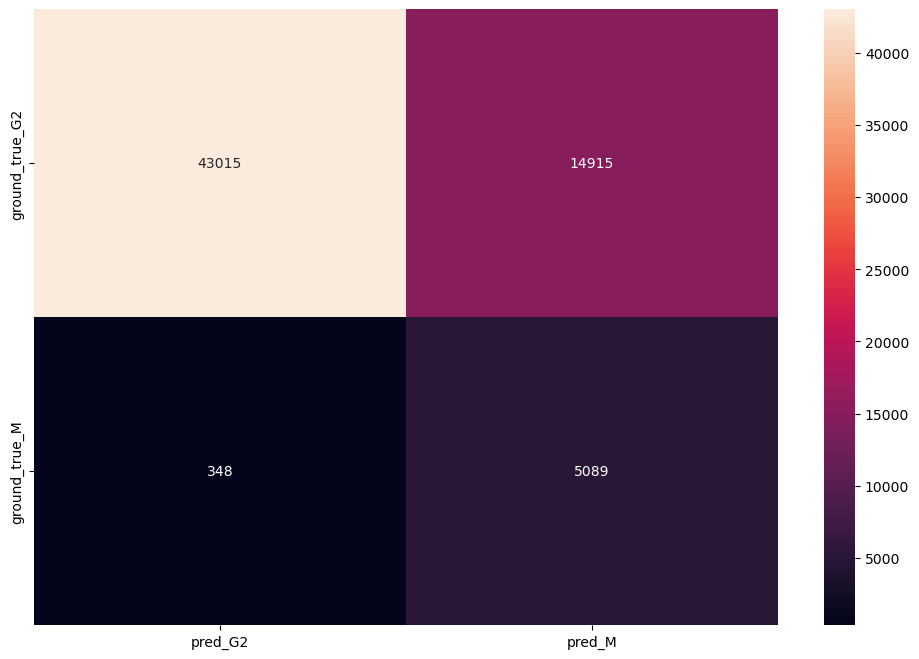

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,MM231,FNTA,275.0,143.0,1.764006e+06,1.764006e+06,20552.743705,3167.606393,20552.743705,12335.708085,...,18998.388795,1,775,3.361477,1.068179,1.509391,1.305678,G2,G2/M,M
1,RPE-1,NT,596.0,413.0,2.139661e+06,2.139661e+06,7186.701471,1726.719422,7186.701471,5180.777324,...,8363.660048,1,2741,4.649165,0.979546,2.379080,2.529007,G2,G2/M,G2
2,U2OS,CDC27,279.0,50.0,2.007591e+06,2.007591e+06,63615.533347,19282.489543,63615.533347,40151.824744,...,9813.386569,1,118,3.152864,0.945590,0.135794,0.297831,G2,G2/M,M
3,MM231,FNTA,341.0,197.0,2.118122e+06,2.118122e+06,14028.380414,3246.687576,14028.380414,10751.888925,...,16318.113815,1,958,4.036277,1.031787,1.865802,1.798731,G2,G2/M,G2
4,MM231,CDC27,85.0,230.0,2.678608e+06,2.678608e+06,18998.368598,3709.215633,18998.368598,11646.121792,...,17053.997079,1,999,5.104335,1.007618,1.945653,2.100041,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,U2OS,CDC27,644.0,119.0,2.980639e+06,2.980639e+06,35501.842111,9796.583702,35501.842111,25047.384503,...,24743.431614,1,404,4.681008,1.015453,0.464923,0.708838,M,G2/M,M
63363,MM231,GPATCH8,673.0,231.0,2.358863e+06,2.358863e+06,14429.198497,3604.289359,14429.198497,10211.527166,...,11367.296169,1,1138,4.495031,0.969607,2.216370,2.109172,G2,G2/M,G2
63364,U2OS,CDC27,582.0,78.0,1.918856e+06,1.918856e+06,39804.885136,11500.497945,39804.885136,24600.721194,...,30891.615135,1,219,3.013509,1.037429,0.252025,0.464616,M,G2/M,M
63365,RPE-1,INHBE,306.0,234.0,1.920969e+06,1.920969e+06,12394.559755,1240.435443,12394.559755,8209.269324,...,9219.823292,1,3695,4.173980,1.035685,3.207114,1.432900,G2,G2/M,G2


In [9]:
data_without_edu = check_pretrained_model(data=data_p1, pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',
                                          features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                    'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                    'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                    'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                    'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                    'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                    'area_cell_norm',
                                                    'area_nucleus_norm',
                                                    ], label='cell_cycle_detailed')
data_without_edu

include EdU

accuracy 0.20286584499818516


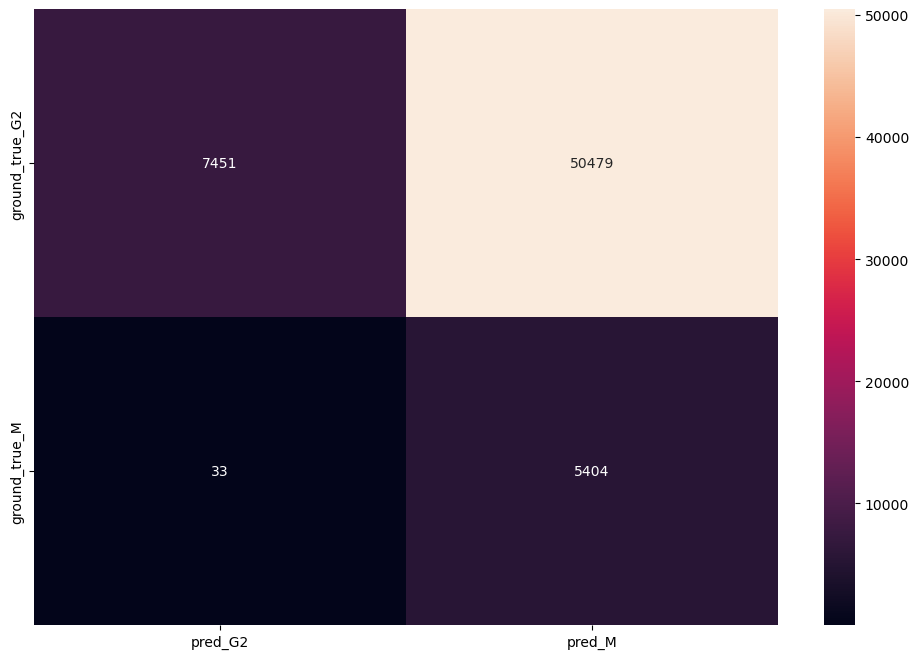

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,RPE-1,FNTA,441.0,368.0,1.905277e+06,1.905277e+06,8031.768872,1457.458945,8031.768872,5177.383029,...,9901.273949,1,3140,4.139883,0.996013,2.725396,2.253449,G2,G2/M,M
1,MM231,ZMAT2,131.0,118.0,1.672473e+06,1.672473e+06,17903.345832,4817.261551,17903.345832,14173.497910,...,17992.416188,1,530,3.187051,1.287249,1.032229,1.077412,G2,G2/M,M
2,U2OS,C1orf131,336.0,324.0,2.573504e+06,2.573504e+06,11962.269885,2524.774419,11962.269885,7942.914755,...,13560.335549,1,1535,4.041615,1.002905,1.766479,1.929945,G2,G2/M,M
3,MM231,QRICH1,547.0,144.0,1.984100e+06,1.984100e+06,19083.376266,4050.312726,19083.376266,13778.472206,...,8311.389027,1,725,3.780886,1.070262,1.412011,1.314808,G2,G2/M,M
4,RPE-1,CDC27,656.0,69.0,1.517814e+06,1.517814e+06,35513.045355,10137.388201,35513.045355,21997.301877,...,14243.031843,1,202,3.297984,1.036560,0.175328,0.422522,M,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63362,RPE-1,NT,215.0,224.0,1.788330e+06,1.788330e+06,12478.562690,2095.558313,12478.562690,7983.615043,...,11005.028094,1,1334,3.885775,0.992692,1.157859,1.371665,G2,G2/M,M
63363,RPE-1,CDK4,235.0,243.0,1.701506e+06,1.701506e+06,11352.664344,1179.320112,11352.664344,7002.083797,...,8258.887914,1,3188,3.697120,1.017790,2.767058,1.488011,G2,G2/M,G2
63364,MM231,INHBE,189.0,108.0,2.021750e+06,2.021750e+06,26698.570312,7667.773648,26698.570312,18719.909453,...,16303.038617,1,414,3.852632,0.922895,0.806307,0.986106,G2,G2/M,M
63365,MM231,INHBE,19.0,152.0,1.879492e+06,1.879492e+06,17787.898710,3139.386571,17787.898710,12365.080530,...,12945.914023,1,907,3.581546,1.010975,1.766474,1.387853,G2,G2/M,M


In [11]:
data_with_edu = check_pretrained_model(data_p1, pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',
                                       features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                 'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                 'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                 'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                 'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                 'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                 'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus',
                                                 'intensity_max_EdU_cell', 'intensity_mean_EdU_cell',
                                                 'intensity_max_EdU_cyto', 'intensity_mean_EdU_cyto',
                                                 'area_cell_norm',
                                                 'EdU_mean_corr_norm',
                                                 'area_nucleus_norm',
                                                 ], label='cell_cycle_detailed')
data_with_edu

# 3. 221108_DepMap_Exp6_siRNAscreen_Plate2_72hrs

In [10]:
df_all_p2=merge_data(df1=df_ori_221108_P2,df2=df_cellcyle_221108_P2,merge_clue_columns='well_id',merge_key_columns=['experiment','plate_id','well_id','cell_line','condition','Cyto_ID','intensity_mean_EdU_cyto','intensity_mean_H3P_cyto','area_cell','area_nucleus',])
df_all_p2.groupby('cell_cycle').count()

,Unnamed: 0_x,experiment,plate_id,well_x,well_id,image_id_x,cell_line,condition,concentration,label,...,DAPI_total_norm_log2,EdU_mean_corr_norm,EdU_mean_corr_norm_log2,H3P_mean_corr_norm,H3P_mean_corr_norm_log2,area_cell_norm,area_cell_norm_log2,area_nucleus_norm,area_nucleus_norm_log2,cell_cycle_detailed
cell_cycle,,,,,,,,,,,,,,,,,,,,,
G1,62046,62046,62046,62046,62046,62046,62046,62046,62046,62046,...,62046,62046,62046,62046,62046,62046,62046,62046,62046,62046
G2/M,25086,25086,25086,25086,25086,25086,25086,25086,25086,25086,...,25086,25086,25086,25086,25086,25086,25086,25086,25086,25086
Polyploid,2353,2353,2353,2353,2353,2353,2353,2353,2353,2353,...,2353,2353,2353,2353,2353,2353,2353,2353,2353,2353
Polyploid (replicating),1740,1740,1740,1740,1740,1740,1740,1740,1740,1740,...,1740,1740,1740,1740,1740,1740,1740,1740,1740,1740
S,42933,42933,42933,42933,42933,42933,42933,42933,42933,42933,...,42933,42933,42933,42933,42933,42933,42933,42933,42933,42933
Sub-G1,2251,2251,2251,2251,2251,2251,2251,2251,2251,2251,...,2251,2251,2251,2251,2251,2251,2251,2251,2251,2251


In [11]:
data_p2=pd.concat([df_all_p2[df_all_p2['cell_cycle']=="G2/M"]])[[ 'cell_line', 'condition', 'label', 'area_nucleus',
       'integrated_int_DAPI', 'DAPI_total', 'intensity_max_DAPI_cell','intensity_mean_DAPI_cell','intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
       'intensity_mean_EdU_nucleus', 'intensity_max_EdU_cell','intensity_mean_EdU_cell', 'intensity_max_EdU_cyto','intensity_mean_EdU_cyto','intensity_max_EdU_nucleus',
       'intensity_mean_Tub_nucleus', 'intensity_max_Tub_cell','intensity_mean_Tub_cell', 'intensity_max_Tub_cyto','intensity_mean_Tub_cyto','intensity_max_Tub_nucleus',
       'nuclei_count', 'area_cell',
       'DAPI_total_norm',
       'EdU_mean_corr_norm',
       'area_cell_norm',
       'area_nucleus_norm','cell_cycle_detailed','cell_cycle']].sample(frac=1).reset_index(drop=True)
data_p2

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_mean_Tub_cyto,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle
0,MM231,GAPD CTL,178.0,180.0,1.384659e+06,1.384659e+06,10312.038822,1595.765557,10312.038822,7692.552669,...,7291.179639,10719.375851,1,1404.0,3.143207,1.024458,2.672189,1.548006,G2,G2/M
1,MM231,NSA2,532.0,149.0,1.585038e+06,1.585038e+06,14235.229137,2860.049647,14235.229137,10637.837615,...,8844.191347,14027.470166,1,744.0,3.598070,1.135583,1.416032,1.281405,G2,G2/M
2,MM231,PPIL4,512.0,158.0,1.814206e+06,1.814206e+06,15835.975392,2607.879531,15835.975392,11482.313489,...,14281.434885,33375.905349,1,1003.0,4.118286,1.054735,1.908978,1.358805,G2,G2/M
3,U2OS,NSA2,16.0,279.0,2.455805e+06,2.455805e+06,12087.996858,2502.083148,12087.996858,8802.167681,...,9496.316091,16194.403810,1,1612.0,3.992306,0.995945,1.699672,1.482874,G2,G2/M
4,MM231,RPL37A,191.0,139.0,1.672883e+06,1.672883e+06,20627.147867,3429.514099,20627.147867,12035.126476,...,11181.619822,19201.532122,1,696.0,3.797480,1.079216,1.324675,1.195404,G2,G2/M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,MM231,GAPD CTL,162.0,181.0,1.892459e+06,1.892459e+06,16055.133847,3280.417554,16055.133847,10455.574939,...,8244.532204,8308.575443,1,813.0,4.295923,1.015708,1.547357,1.556606,G2,G2/M
25082,MM231,PRIM1,869.0,162.0,1.854041e+06,1.854041e+06,15942.068987,3524.503669,15942.068987,11444.697448,...,12208.843890,18683.348124,1,698.0,4.208713,1.020436,1.328481,1.393205,G2,G2/M
25083,MM231,ELOF1,288.0,275.0,2.203116e+06,2.203116e+06,12314.408384,1744.037540,12314.408384,8011.331222,...,7759.623957,11452.320011,1,2234.0,5.001121,1.038838,4.251901,2.365008,G2,G2/M
25084,MM231,PPIL4,145.0,154.0,2.145102e+06,2.145102e+06,17501.258125,5995.205720,17501.258125,13929.235113,...,11585.596904,18473.930649,1,456.0,4.869428,1.045997,0.867890,1.324405,G2,G2/M


without Edu

accuracy 0.5886151638364028


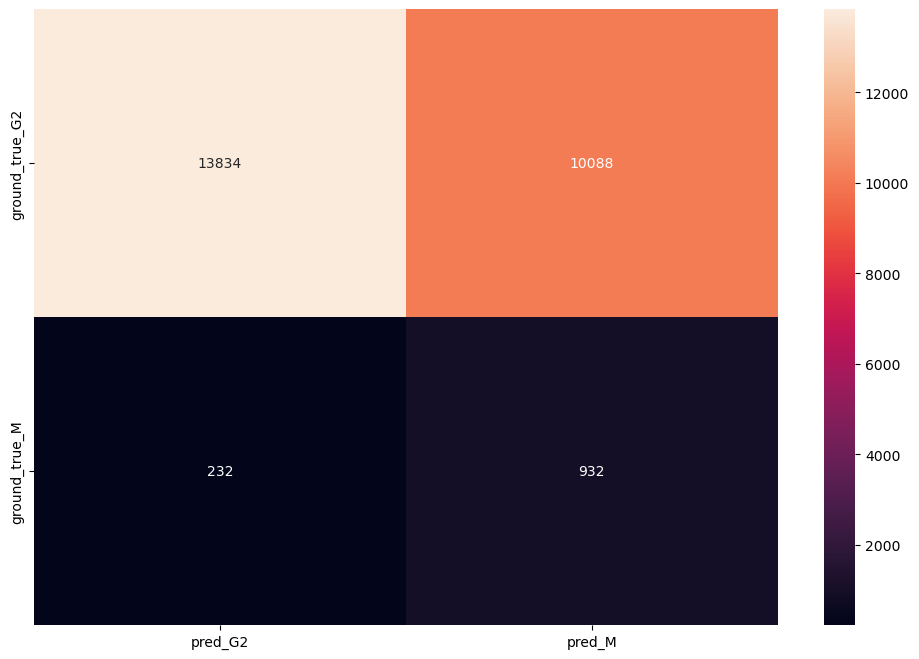

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,MM231,GAPD CTL,178.0,180.0,1.384659e+06,1.384659e+06,10312.038822,1595.765557,10312.038822,7692.552669,...,10719.375851,1,1404.0,3.143207,1.024458,2.672189,1.548006,G2,G2/M,G2
1,MM231,NSA2,532.0,149.0,1.585038e+06,1.585038e+06,14235.229137,2860.049647,14235.229137,10637.837615,...,14027.470166,1,744.0,3.598070,1.135583,1.416032,1.281405,G2,G2/M,G2
2,MM231,PPIL4,512.0,158.0,1.814206e+06,1.814206e+06,15835.975392,2607.879531,15835.975392,11482.313489,...,33375.905349,1,1003.0,4.118286,1.054735,1.908978,1.358805,G2,G2/M,M
3,U2OS,NSA2,16.0,279.0,2.455805e+06,2.455805e+06,12087.996858,2502.083148,12087.996858,8802.167681,...,16194.403810,1,1612.0,3.992306,0.995945,1.699672,1.482874,G2,G2/M,G2
4,MM231,RPL37A,191.0,139.0,1.672883e+06,1.672883e+06,20627.147867,3429.514099,20627.147867,12035.126476,...,19201.532122,1,696.0,3.797480,1.079216,1.324675,1.195404,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,MM231,GAPD CTL,162.0,181.0,1.892459e+06,1.892459e+06,16055.133847,3280.417554,16055.133847,10455.574939,...,8308.575443,1,813.0,4.295923,1.015708,1.547357,1.556606,G2,G2/M,G2
25082,MM231,PRIM1,869.0,162.0,1.854041e+06,1.854041e+06,15942.068987,3524.503669,15942.068987,11444.697448,...,18683.348124,1,698.0,4.208713,1.020436,1.328481,1.393205,G2,G2/M,G2
25083,MM231,ELOF1,288.0,275.0,2.203116e+06,2.203116e+06,12314.408384,1744.037540,12314.408384,8011.331222,...,11452.320011,1,2234.0,5.001121,1.038838,4.251901,2.365008,G2,G2/M,G2
25084,MM231,PPIL4,145.0,154.0,2.145102e+06,2.145102e+06,17501.258125,5995.205720,17501.258125,13929.235113,...,18473.930649,1,456.0,4.869428,1.045997,0.867890,1.324405,G2,G2/M,M


In [12]:
data_without_edu = check_pretrained_model(data=data_p2, pretrained_svm='pretrained_SVM_U20S_without_edu.joblib',
                                          features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                    'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                    'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                    'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                    'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                    'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                    'area_cell_norm',
                                                    'area_nucleus_norm',
                                                    ], label='cell_cycle_detailed')
data_without_edu

including Edu

accuracy 0.16818145579207527


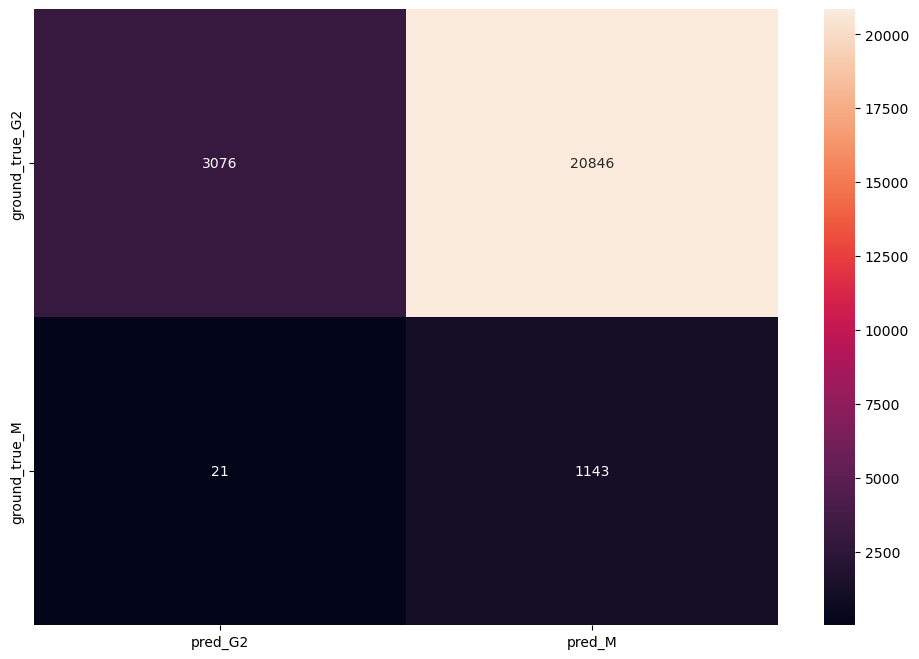

,cell_line,condition,label,area_nucleus,integrated_int_DAPI,DAPI_total,intensity_max_DAPI_cell,intensity_mean_DAPI_cell,intensity_max_DAPI_nucleus,intensity_mean_DAPI_nucleus,...,intensity_max_Tub_nucleus,nuclei_count,area_cell,DAPI_total_norm,EdU_mean_corr_norm,area_cell_norm,area_nucleus_norm,cell_cycle_detailed,cell_cycle,SVM_predicted_detail
0,U2OS,RPL37A,16.0,203.0,2.637709e+06,2.637709e+06,23931.806243,6754.340088,23931.806243,12993.642231,...,44801.166891,1,469.0,4.288021,1.149872,0.494507,1.078937,G2,G2/M,M
1,MM231,ELOF1,497.0,135.0,1.579578e+06,1.579578e+06,16202.878235,3577.591756,16202.878235,11700.578400,...,16568.769606,1,581.0,3.585676,1.035386,1.105799,1.161004,G2,G2/M,M
2,U2OS,ISCU,93.0,199.0,1.898285e+06,1.898285e+06,15305.777607,2399.013103,15305.777607,9539.120796,...,12750.714737,1,1198.0,3.085968,0.986132,1.263156,1.057677,G2,G2/M,G2
3,RPE-1,ISCU,177.0,279.0,1.713878e+06,1.713878e+06,8731.349164,1608.047416,8731.349164,6142.930317,...,15574.964196,1,2078.0,4.078588,0.977314,1.803622,1.954808,G2,G2/M,M
4,U2OS,ISCU,277.0,293.0,2.488827e+06,2.488827e+06,12331.034091,2315.603436,12331.034091,8494.288806,...,20968.827582,1,1663.0,4.045988,1.107060,1.753445,1.557283,G2,G2/M,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25081,MM231,ELOF1,113.0,197.0,1.613236e+06,1.613236e+06,12197.144105,2224.574710,12197.144105,8189.014640,...,16411.124960,1,1102.0,3.662080,1.004149,2.097402,1.694206,G2,G2/M,M
25082,MM231,IPO9,372.0,158.0,2.050788e+06,2.050788e+06,17853.569537,4781.242605,17853.569537,12979.671441,...,10360.815741,1,623.0,4.655333,0.903396,1.185736,1.358805,G2,G2/M,M
25083,U2OS,PRIM1,813.0,243.0,2.961585e+06,2.961585e+06,18369.462786,2868.189468,18369.462786,12187.590910,...,13926.879603,1,1561.0,4.814533,1.031412,1.645898,1.291535,G2,G2/M,M
25084,MM231,NSA2,531.0,113.0,1.519224e+06,1.519224e+06,18107.242468,4401.996618,18107.242468,13444.457259,...,13362.737291,1,459.0,3.448671,1.137798,0.873600,0.971803,G2,G2/M,M


In [15]:
data_with_edu = check_pretrained_model(data_p2, pretrained_svm='pretrained_SVM_U20S_with_edu.joblib',
                                       features=['intensity_max_DAPI_nucleus', 'intensity_mean_DAPI_nucleus',
                                                 'integrated_int_DAPI', 'intensity_max_DAPI_cell',
                                                 'intensity_mean_DAPI_cell', 'DAPI_total_norm',
                                                 'intensity_max_Tub_nucleus', 'intensity_mean_Tub_nucleus',
                                                 'intensity_max_Tub_cell', 'intensity_mean_Tub_cell',
                                                 'intensity_max_Tub_cyto', 'intensity_mean_Tub_cyto',
                                                 'intensity_max_EdU_nucleus', 'intensity_mean_EdU_nucleus',
                                                 'intensity_max_EdU_cell', 'intensity_mean_EdU_cell',
                                                 'intensity_max_EdU_cyto', 'intensity_mean_EdU_cyto',
                                                 'area_cell_norm',
                                                 'EdU_mean_corr_norm',
                                                 'area_nucleus_norm',
                                                 ], label='cell_cycle_detailed')
data_with_edu

In [ ]:
from omero_screen.image_analysis import Image
from cellpose import models
from omero_screen.general_functions import save_fig, generate_image, filter_segmentation, omero_connect, scale_img, \
    color_label
def n_segmentation(image):
    """perform cellpose segmentation using nuclear mask """
    model = models.CellposeModel(gpu=True, model_type='/Users/haoranyue/PycharmProjects/Omero_Screen_2/data/CellPose_models/Nuclei_Hoechst')

    n_channels = [[0, 0]]
    n_mask_array, n_flows, n_styles = model.eval(self.img_dict['DAPI'], channels=n_channels)

        # return cleaned up mask using filter function
    return filter_segmentation(n_mask_array)

def c_segmentation(image_DAPI,image_Tub):
    """perform cellpose segmentation using cell mask """
    model = models.CellposeModel(gpu=True, model_type='/Users/haoranyue/PycharmProjects/Omero_Screen_2/data/CellPose_models/HeLa_Tub_Hoechst')
    c_channels = [[2, 1]]
    # combine the 2 channel numpy array for cell segmentation with the nuclei channel
    comb_image = np.dstack([image_DAPI, image_Tub])
    c_masks_array, c_flows, c_styles = model.eval(comb_image, channels=c_channels)
    # return cleaned up mask using filter function
    return filter_segmentation(c_masks_array)

In [145]:
import skimage
check_8_DAPI=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check8.tif')
check_tub8=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check_tub8.tif')
check_10_DAPI=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check10.tif')
check_tub10=skimage.io.imread('/Users/haoranyue/Desktop/221215_mm231_test01/images/check_tub10.tif')

In [146]:
from skimage.measure import label, regionprops, regionprops_table
import pandas as pd

def same_img(image1,image2):
    props_1 = pd.DataFrame(regionprops_table(image1, properties=('label','centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length')))
    props_2 = pd.DataFrame(regionprops_table(image2, properties=('label','centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length')))

    if props_1.equals(props_2):
        print('the input two image are same')
    else:
        print('the two input image are different')
    return (props_1,props_2)

In [147]:

# props_1,props_2=same_img(check_7_DAPI,check_8_DAPI)
props_1,props_2=same_img(check_tub8,check_tub10)

the input two image are same
